## Import Used Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import tensorflow
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import warnings
warnings.filterwarnings(action='ignore')

## Loading Images File

In [2]:
data_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

## Preparing Images For Training By Image Preprocessing

In [3]:
train_datagen= ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1/255.0,
    fill_mode='nearest',
    validation_split=0.1)
val_datagen= ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255.0,
    validation_split=0.1)
train= train_datagen.flow_from_directory(train_dir,batch_size=128,target_size=(210,210),color_mode='rgb',class_mode='categorical',seed=42)
valid=val_datagen.flow_from_directory(valid_dir,batch_size=128,target_size=(210,210),color_mode='rgb',class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


## Model 2

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,3,activation="relu",padding="same",input_shape=(210,210,3)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64,3,activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D())
model.add(BatchNormalization())
model.add(keras.layers.Conv2D(128,3,activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D())
model.add(BatchNormalization())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(38,activation="softmax"))

model.summary()

2022-11-15 21:36:14.816129: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 210, 210, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 210, 210, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 105, 105, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 105, 105, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 52, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 52, 52, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train,validation_data=valid,epochs = 6)

2022-11-15 21:36:17.563957: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/6
550/550 [==============================] - 4939s 9s/step - loss: 2.2142 - accuracy: 0.4193 - val_loss: 5.0626 - val_accuracy: 0.2623
Epoch 2/6
550/550 [==============================] - 5185s 9s/step - loss: 0.8997 - accuracy: 0.7256 - val_loss: 1.6996 - val_accuracy: 0.5810
Epoch 3/6
550/550 [==============================] - 4826s 9s/step - loss: 0.5399 - accuracy: 0.8320 - val_loss: 0.6648 - val_accuracy: 0.8004
Epoch 4/6
550/550 [==============================] - 4721s 9s/step - loss: 0.3988 - accuracy: 0.8745 - val_loss: 0.4948 - val_accuracy: 0.8581
Epoch 5/6
550/550 [==============================] - 5043s 9s/step - loss: 0.3206 - accuracy: 0.8984 - val_loss: 1.0540 - val_accuracy: 0.7259
Epoch 6/6
550/550 [==============================] - 4944s 9s/step - loss: 0.2840 - accuracy: 0.9109 - val_loss: 0.5372 - val_accuracy: 0.8518


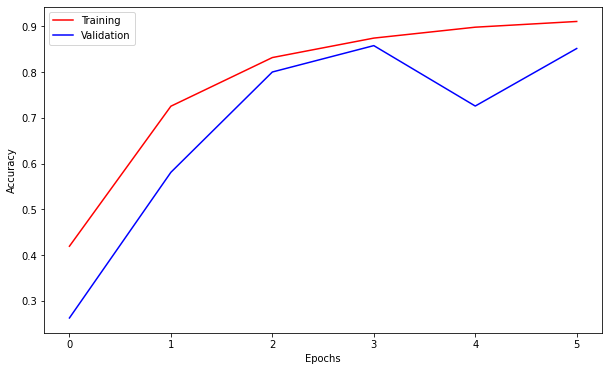

In [6]:
acc =history.history['loss']
val_acc =history.history['val_loss']
epochs = range(len(acc))
fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

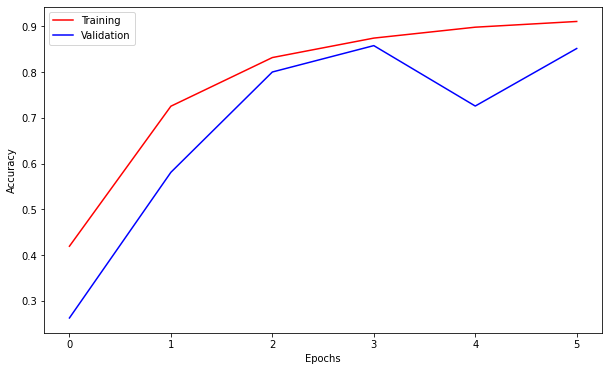

In [7]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [8]:
model.save("model1.h5")